In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
dataset_df = pd.read_csv("dataset capstone.csv", encoding='latin-1')
dataset_df

,model,price,year,mileage,location,tax,seller_type
0,HONDA ALN VARIO 160 ABS,24800000.0,2023.0,"15,000",Karah,hidup,dealer
1,HONDA VARIO 150 ESP EXCLSV,18900000.0,2018.0,"30,000",Kota Bambu Utara,hidup,dealer
2,HONDA VARIO 125 ESPCBS ISS,18500000.0,2018.0,"30,000",Gading,hidup,dealer
3,HONDA VARIO 125ESP CBS ISS,16600000.0,2018.0,"30,000",Kota Bekasi,hidup,dealer
4,HONDA VARIO 150 ESP EXCLSV,17200000.0,2017.0,"30,000",Kota Tangerang Selatan,hidup,dealer
...,...,...,...,...,...,...,...
5658,0 yamaha aerox 155 LED 2023 bln 10 freego nma...,24200000.0,2023.0,0-5.000,"Mampang Prapatan, Jakarta Selatan, Jakarta D.K.I.",panjang,Diler
5659,VARIO 150 LED NEW THN 2018 AHIR PAJAK BULN 12...,17500000.0,2018.0,25.000-30.000,"Mampang Prapatan, Jakarta Selatan, Jakarta D.K.I.",super,Diler
5660,"Vario125cc istimewahh, buku servish masih ada",19900000.0,2023.0,10.000-15.000,"Kemayoran, Jakarta Pusat, Jakarta D.K.I.",onrumah,Diler
5661,HONDA VARIO 150 2021 SIAP PAKAI (CASH/KREDIT),21300000.0,2021.0,NaN,"Pancoran Mas, Depok Kota, Jawa Barat",hidup*,unknown


In [32]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5663 entries, 0 to 5662
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   model        5662 non-null   object 
 1   price        5662 non-null   float64
 2   year         5662 non-null   float64
 3   mileage      5127 non-null   object 
 4   location     5609 non-null   object 
 5   tax          5408 non-null   object 
 6   seller_type  5662 non-null   object 
dtypes: float64(2), object(5)
memory usage: 309.8+ KB


Terdapat sedikit perbedaan pada jumlah data pada kolom milieage dan tax, hal ini menunjukkan adanya missing values pada 2 kolom tersebut

In [35]:
dataset_df.isna().sum()

model            1
price            1
year             1
mileage        536
location        54
tax            255
seller_type      1
dtype: int64

terdapat 502 Missing Value pada kolom mileage dan 189 Missing Value pada kolom tax

In [36]:
#memeriksa duplikasi data
print("Jumlah duplikasi: ", dataset_df.duplicated().sum())

Jumlah duplikasi:  3571


terdapat 2105 duplikasi data

In [6]:
#menghilangkan duplikasi data

In [37]:
dataset_df.drop_duplicates(inplace=True)

In [38]:
print("Jumlah duplikasi: ", dataset_df.duplicated().sum())

Jumlah duplikasi:  0


In [57]:
data_df = dataset_df
data_df
data_df.to_csv('dataset capstone clean.csv', index=False)

Menangani Missing Value

In [ ]:
data_df.location.value_counts()

location
Kab. Bandung                                       122
Kota Depok                                         117
Pancoran Mas, Depok Kota, Jawa Barat               109
Kota Jakarta Timur                                 106
Kota Denpasar                                       93
                                                  ... 
Kebon Jeruk, Jakarta Barat, Jakarta D.K.I.           1
Kebayoran Baru, Jakarta Selatan, Jakarta D.K.I.      1
Cibubur, Jakarta Timur, Jakarta D.K.I.               1
Ciracas, Jakarta Timur, Jakarta D.K.I.               1
Pasar Rebo, Jakarta Timur, Jakarta D.K.I.            1
Name: count, Length: 257, dtype: int64

In [46]:
data_df.fillna({'location': "Kab. Bandung"}, inplace=True)

In [47]:
data_df.tax.value_counts()

tax
hidup                    1546
Kab. Bandung              110
hidup*                     99
hidupã                   51
:                          36
panjang                    35
masih                      24
,                          22
:ab                        19
stnk                       17
on                         11
off                        10
baru                       10
panjang]                    9
&                           5
06-2022~                    5
11-2023~                    4
09-2024~                    4
09-2023~                    4
11-2022~                    4
06-2020~                    4
panjang]all                 4
tahunan                     3
â                         3
hiduppemakaian              3
cash                        2
panjangkondisi              2
aman                        2
09/08/24masa                2
sudah                       2
03-                         2
panjang-                    2
ontertarik                  2
02-202

In [48]:
data_df.fillna({'tax': "Kab. Bandung"}, inplace=True)

In [56]:
data_df.mileage.value_counts()

mileage
30,000              610
15,000              500
7,500               246
2,500                98
15.000-20.000        72
5.000-10.000         61
25.000-30.000        59
0-5.000              49
30.000-35.000        46
10.000-15.000        46
20.000-25.000        42
500                  27
35.000-40.000        26
40.000-45.000        19
55.000-60.000        12
45.000-50.000        12
50.000-55.000         7
65.000-70.000         6
NaN                   5
95.000-100.000        5
85.000-90.000         5
80.000-85.000         5
60.000-65.000         4
120.000-125.000       3
75.000-80.000         2
100.000-105.000       1
70.000-75.000         1
Name: count, dtype: int64

Langkah 1: Cek data awal
Tipe data mileage: object
Tipe data price: float64

Sample data mileage: 0    15,000
1    30,000
2    30,000
3    30,000
4    30,000
Name: mileage, dtype: object
Sample data price: 0    24800000.0
1    18900000.0
2    18500000.0
3    16600000.0
4    17200000.0
Name: price, dtype: float64

Langkah 2: Cek data setelah dibersihkan
Tipe data mileage: float64
Tipe data price: float64

Statistik mileage:
count     1530.000000
mean     18237.741830
std      10452.654284
min          5.000000
25%       7500.000000
50%      15000.000000
75%      30000.000000
max      30000.000000
Name: mileage, dtype: float64

Statistik price:
count    2.091000e+03
mean     1.970477e+07
std      9.634124e+06
min      3.500000e+06
25%      1.700000e+07
50%      2.010000e+07
75%      2.210000e+07
max      2.950000e+08
Name: price, dtype: float64

Langkah 3: Hasil korelasi
Correlation with price (original data): -0.245
Correlation with price (after imputation): -0.172


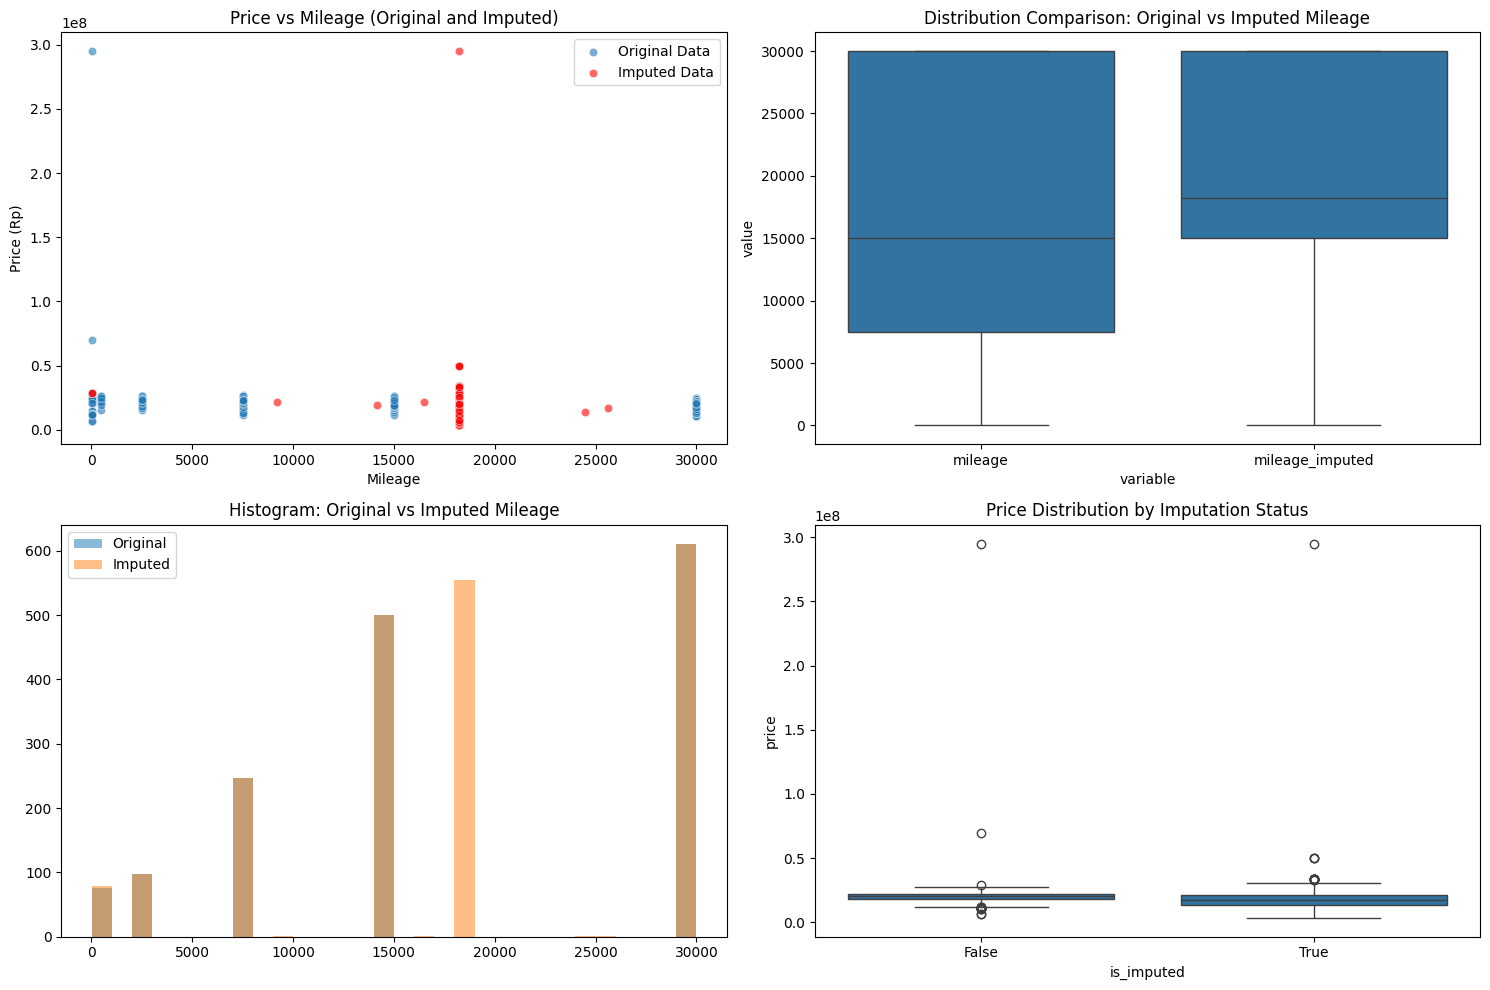


Original Mileage Statistics:
count     1530.000000
mean     18237.741830
std      10452.654284
min          5.000000
25%       7500.000000
50%      15000.000000
75%      30000.000000
max      30000.000000
Name: mileage, dtype: float64

Imputed Mileage Statistics:
count     2091.000000
mean     18219.701544
std       8963.352489
min          5.000000
25%      15000.000000
50%      18237.741830
75%      30000.000000
max      30000.000000
Name: mileage_imputed, dtype: float64


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Cek data terlebih dahulu
print("Langkah 1: Cek data awal")
print("Tipe data mileage:", dataset_df['mileage'].dtype)
print("Tipe data price:", dataset_df['price'].dtype)
print("\nSample data mileage:", dataset_df['mileage'].head())
print("Sample data price:", dataset_df['price'].head())

# Bersihkan dan konversi data
def clean_data(df):
    # Buat copy dari dataframe
    df_clean = df.copy()
    
    # Bersihkan kolom mileage (hilangkan karakter non-numeric)
    if df_clean['mileage'].dtype == 'object':
        df_clean['mileage'] = df_clean['mileage'].replace('[^0-9.]', '', regex=True)
    
    # Konversi mileage ke numeric
    df_clean['mileage'] = pd.to_numeric(df_clean['mileage'], errors='coerce')
    
    # Bersihkan kolom price
    if df_clean['price'].dtype == 'object':
        df_clean['price'] = df_clean['price'].astype(str).str.replace('Rp', '').str.replace('.', '').str.replace(',', '')
    
    # Konversi price ke numeric
    df_clean['price'] = pd.to_numeric(df_clean['price'], errors='coerce')
    
    return df_clean

# Bersihkan data
olx_df_clean = clean_data(dataset_df)

print("\nLangkah 2: Cek data setelah dibersihkan")
print("Tipe data mileage:", olx_df_clean['mileage'].dtype)
print("Tipe data price:", olx_df_clean['price'].dtype)
print("\nStatistik mileage:")
print(olx_df_clean['mileage'].describe())
print("\nStatistik price:")
print(olx_df_clean['price'].describe())

# Lakukan imputasi
def impute_mileage(df):
    # Hitung rata-rata berdasarkan grup
    group_means = df.groupby(['year', 'model'])['mileage'].transform('mean')
    model_means = df.groupby(['model'])['mileage'].transform('mean')
    total_mean = df['mileage'].mean()
    
    # Imputasi bertahap
    df['mileage_imputed'] = df['mileage'].fillna(group_means)
    df['mileage_imputed'] = df['mileage_imputed'].fillna(model_means)
    df['mileage_imputed'] = df['mileage_imputed'].fillna(total_mean)
    
    df['is_imputed'] = df['mileage'].isna()
    
    return df

# Lakukan imputasi
olx_df_imputed = impute_mileage(olx_df_clean)

# Hitung korelasi (hanya untuk data yang valid)
corr_original = olx_df_imputed[olx_df_imputed['mileage'].notna()]['mileage'].corr(
    olx_df_imputed[olx_df_imputed['mileage'].notna()]['price']
)
corr_imputed = olx_df_imputed[olx_df_imputed['mileage_imputed'].notna()]['mileage_imputed'].corr(
    olx_df_imputed[olx_df_imputed['mileage_imputed'].notna()]['price']
)

print("\nLangkah 3: Hasil korelasi")
print(f"Correlation with price (original data): {corr_original:.3f}")
print(f"Correlation with price (after imputation): {corr_imputed:.3f}")

# Visualisasi
plt.figure(figsize=(15, 10))

# Plot 1: Scatter plot
valid_data = olx_df_imputed.dropna(subset=['mileage_imputed', 'price'])
plt.subplot(2, 2, 1)
sns.scatterplot(data=valid_data[~valid_data['is_imputed']], 
                x='mileage', y='price', 
                label='Original Data', alpha=0.6)
sns.scatterplot(data=valid_data[valid_data['is_imputed']], 
                x='mileage_imputed', y='price', 
                label='Imputed Data', alpha=0.6, color='red')
plt.title('Price vs Mileage (Original and Imputed)')
plt.xlabel('Mileage')
plt.ylabel('Price (Rp)')

# Plot 2: Box plot distribusi
valid_melted = pd.melt(valid_data[['mileage', 'mileage_imputed']])
plt.subplot(2, 2, 2)
sns.boxplot(x='variable', y='value', data=valid_melted)
plt.title('Distribution Comparison: Original vs Imputed Mileage')

# Plot 3: Histogram
plt.subplot(2, 2, 3)
plt.hist(valid_data[valid_data['mileage'].notna()]['mileage'], 
         alpha=0.5, label='Original', bins=30)
plt.hist(valid_data['mileage_imputed'], 
         alpha=0.5, label='Imputed', bins=30)
plt.title('Histogram: Original vs Imputed Mileage')
plt.legend()

# Plot 4: Price distribution
plt.subplot(2, 2, 4)
sns.boxplot(x='is_imputed', y='price', data=valid_data)
plt.title('Price Distribution by Imputation Status')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nOriginal Mileage Statistics:")
print(valid_data['mileage'].describe())
print("\nImputed Mileage Statistics:")
print(valid_data['mileage_imputed'].describe())

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Pisahkan data yang tidak memiliki missing value
data_known = data_df[data_df['mileage'].notna()]


# Buat model regresi
model = LinearRegression()
model.fit(data_known[['price']], data_known['mileage'])

# Estimasi missing value
data_df.loc[data_df['mileage'].isna(), 'mileage'] = model.predict(data_df.loc[data_df['mileage'].isna(), ['price']])

TypeError: unhashable type: 'list'